In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv("./data/dataframe.csv", index_col="Unnamed: 0")
df

,Location,Property subtype,Price,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Garden,Surface area land,Pool,Condition
0,Verviers,HOUSE,296607.0,3.0,130.0,False,False,False,True,True,239.0,False,True
2,Aalst,HOUSE,299000.0,5.0,200.0,True,False,False,False,False,1150.0,False,True
3,Charleroi,HOUSE,300000.0,0.0,270.0,False,False,False,True,True,498.0,False,False
4,Nivelles,HOUSE,195000.0,3.0,135.0,True,False,False,True,False,165.0,False,False
6,Oudenaarde,HOUSE,415000.0,3.0,207.0,True,False,False,True,True,534.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10068,Marche-en-Famenne,HOUSE,390000.0,7.0,326.0,True,False,True,True,True,0.0,False,True
10069,Halle-Vilvoorde,HOUSE,488000.0,3.0,150.0,True,False,False,True,True,390.0,False,True
10070,Aalst,VILLA,550000.0,4.0,1380.0,True,False,True,True,True,1300.0,False,True
10071,Charleroi,HOUSE,115000.0,2.0,120.0,False,False,False,False,True,310.0,False,True


In [5]:
type(df["Property subtype"].drop_duplicates())

pandas.core.series.Series

In [3]:
train_df = pd.get_dummies(df)
train_df.corr().Price

Price                                  1.000000
Number of bedrooms                     0.127265
Living area                            0.509285
Kitchen                                0.069707
Furnished                              0.066064
                                         ...   
Property subtype_MANSION               0.105717
Property subtype_MIXED_USE_BUILDING    0.040878
Property subtype_OTHER_PROPERTY        0.070808
Property subtype_TOWN_HOUSE           -0.017156
Property subtype_VILLA                 0.266633
Name: Price, Length: 186, dtype: float64

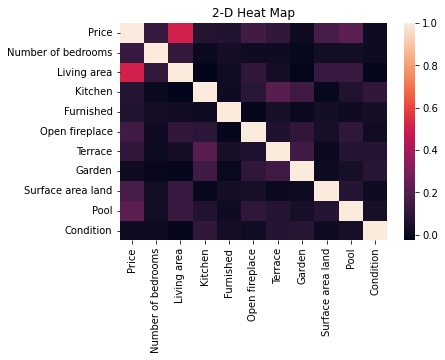

In [4]:
ax = sns.heatmap(df.corr())
  
plt.title( "2-D Heat Map" )
plt.show()

<BarContainer object of 14 artists>

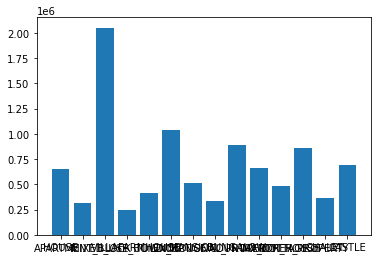

In [5]:
plt.bar(df["Property subtype"].drop_duplicates(), df.groupby("Property subtype").mean().Price)

In [6]:
df.groupby("Property subtype").mean().Price

Property subtype
APARTMENT_BLOCK         6.527246e+05
BUNGALOW                3.141900e+05
CASTLE                  2.050000e+06
CHALET                  2.445000e+05
COUNTRY_COTTAGE         4.106226e+05
EXCEPTIONAL_PROPERTY    1.039724e+06
FARMHOUSE               5.097933e+05
HOUSE                   3.371955e+05
MANOR_HOUSE             8.921667e+05
MANSION                 6.625279e+05
MIXED_USE_BUILDING      4.878384e+05
OTHER_PROPERTY          8.607353e+05
TOWN_HOUSE              3.626649e+05
VILLA                   6.968433e+05
Name: Price, dtype: float64

In [7]:
df["Property subtype"].drop_duplicates()

0                      HOUSE
26           APARTMENT_BLOCK
34                     VILLA
45        MIXED_USE_BUILDING
144                FARMHOUSE
187               TOWN_HOUSE
192                  MANSION
200     EXCEPTIONAL_PROPERTY
233                 BUNGALOW
458          COUNTRY_COTTAGE
591              MANOR_HOUSE
2050          OTHER_PROPERTY
2392                  CHALET
3075                  CASTLE
Name: Property subtype, dtype: object

In [8]:
X = train_df.drop("Price", axis=1)
y = train_df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
clf = RandomForestRegressor().fit(X_train, y_train)
clf.score(X_train, y_train)

0.9410152604319119

In [10]:
clf.score(X_test, y_test)

0.59187054278961

In [12]:
pickle.dump(clf, open("models/random_forest.sav", 'wb'))